In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime 

In [251]:
path = os.getcwd()
clients = pd.read_csv('Clients.csv')
payments = pd.read_csv('Payments.csv')
payments.count()

transaction_id      25559
contract_id         25559
client_id           25559
transaction_date    25559
payment_amt         25559
payment_code        25559
dtype: int64

In [124]:
payments

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code
0,20175,927,1,1527012511,66.66,PAYMENT
1,8485,927,1,1511716095,66.66,PAYMENT
2,13778,927,1,1519319303,66.66,PAYMENT
3,22768,927,1,1529863724,66.66,PAYMENT
4,15698,927,1,1521738504,66.66,PAYMENT
5,25167,927,1,1532282887,416.67,PAYMENT
6,8322,927,1,1511370496,5050.04,PAYMENT
7,8484,927,1,1511716095,466.67,PAYMENT
8,17649,927,1,1524420511,416.67,PAYMENT
9,8323,927,1,1511370496,50.00,PAYMENT


In [252]:
payments['date'] = pd.to_datetime(payments['transaction_date'], unit = 's')
payments.groupby('date')
payments.count()

transaction_id      25559
contract_id         25559
client_id           25559
transaction_date    25559
payment_amt         25559
payment_code        25559
date                25559
dtype: int64

In [253]:
#set style of plot
plt.style.use('ggplot')
#get range of dates
payments.set_index('date', inplace = True)
payments.index.max()

Timestamp('2018-07-24 18:08:10')

In [254]:
payments.index.min()
#date is from 2017 July 2nd to 2019 July 24th

Timestamp('2017-07-02 18:08:02')

In [232]:
%matplotlib inline

In [129]:
payments.describe()

,transaction_id,contract_id,client_id,transaction_date,payment_amt
count,25559.000000,25559.000000,25559.000000,2.555900e+04,25559.000000
mean,12780.000000,758.221409,602.886811,1.517126e+09,1221.455691
std,7378.392101,352.190207,344.782295,9.964331e+06,4346.049363
min,1.000000,1.000000,1.000000,1.499019e+09,-136.660000
25%,6390.500000,510.000000,308.000000,1.508433e+09,93.330000
50%,12780.000000,732.000000,593.000000,1.518110e+09,266.660000
75%,19169.500000,991.000000,894.000000,1.525976e+09,833.330000
max,25559.000000,1643.000000,1281.000000,1.532456e+09,200000.050000


In [255]:
clients.sort_values('client_id')
clients['entity_type'].value_counts()


Australian Private Company        754
Individual/Sole Trader            457
Family Partnership                 39
Discretionary Trading Trust        12
Other Partnership                  10
Australian Public Company           6
Fixed Unit Trust                    4
Discretionary Investment Trust      3
Australian Proprietary Company      1
Hybrid Trust                        1
Name: entity_type, dtype: int64

([<matplotlib.patches.Wedge at 0x1e7139ba4e0>,
 [Text(-0.296318,-1.05934,'PAYMENT'), Text(0.323256,1.15564,'DEFAULT')],
 [Text(-0.161628,-0.57782,'91.3%'), Text(0.188566,0.674124,'8.7%')])

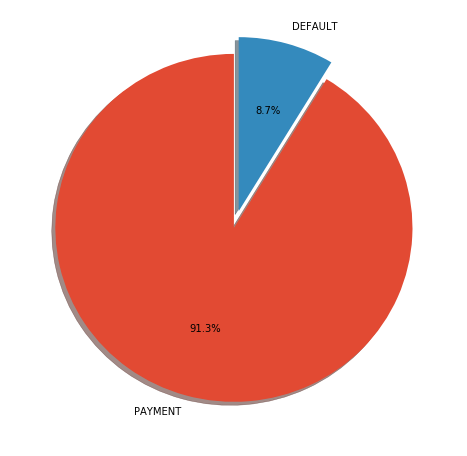

In [63]:
payments.sort_values('client_id')
payments.head(10)
#How many default payments? how many payments?
sizes = [pie['PAYMENT'],pie['DEFAULT']]
#plt.plot.pie
fig1, ax1 = plt.subplots(figsize = (8,8))
explode = [0,.1]
labels = ['PAYMENT','DEFAULT']
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True ,startangle = 90)

In [256]:
#match ids with companys
payments['Binary'] = 0
payments.loc[payments['payment_code'] == 'DEFAULT',['Binary']] = [1]
payments.head(10)

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,Binary
date,,,,,,,
2018-05-22 18:08:31,20175,927,1,1527012511,66.66,PAYMENT,0
2017-11-26 17:08:15,8485,927,1,1511716095,66.66,PAYMENT,0
2018-02-22 17:08:23,13778,927,1,1519319303,66.66,PAYMENT,0
2018-06-24 18:08:44,22768,927,1,1529863724,66.66,PAYMENT,0
2018-03-22 17:08:24,15698,927,1,1521738504,66.66,PAYMENT,0
2018-07-22 18:08:07,25167,927,1,1532282887,416.67,PAYMENT,0
2017-11-22 17:08:16,8322,927,1,1511370496,5050.04,PAYMENT,0
2017-11-26 17:08:15,8484,927,1,1511716095,466.67,PAYMENT,0
2018-04-22 18:08:31,17649,927,1,1524420511,416.67,PAYMENT,0


In [257]:
#years of operation
clients['years_operation'] = 2018 - clients['entity_year_established']
clients['years_operation'].describe()


count    1287.000000
mean        8.927739
std         5.708598
min         0.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        19.000000
Name: years_operation, dtype: float64

Text(0.5,0,'Years of operation')

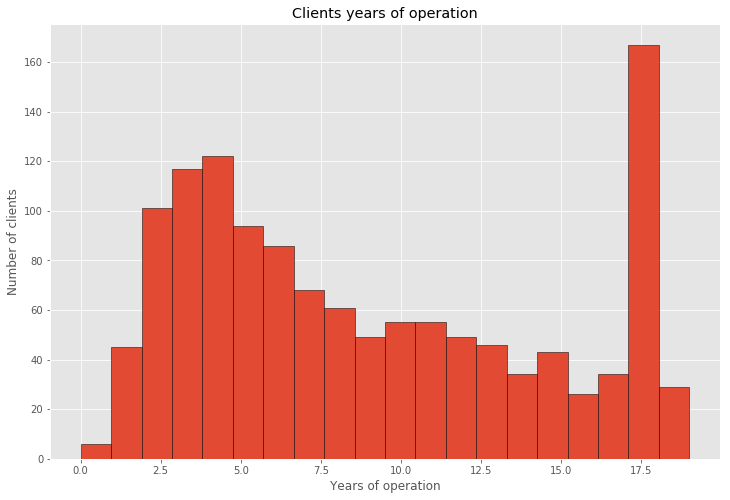

In [258]:
clients['years_operation'].plot.hist(figsize = (12,8), edgecolor = 'black', bins = 20);
plt.title('Clients years of operation')
plt.ylabel('Number of clients')
plt.xlabel('Years of operation')

In [259]:
clients.describe()
default = payments[payments['Binary'] == 1]
#default = payments[payments['payment_code']== 'DEFAULT']
default.count()

transaction_id      2219
contract_id         2219
client_id           2219
transaction_date    2219
payment_amt         2219
payment_code        2219
Binary              2219
dtype: int64

In [260]:
default.head(10)
m = pd.merge(left = clients,right = default, on = 'client_id', how = 'left')
len(m['client_id'].unique())

1281

In [261]:
payments.loc[payments['payment_code'] == 'DEFAULT',['Binary']] = [1]
clients['Binary'] = 0
#Set the clients to one if default
clientdef = payments.groupby(['client_id', 'Binary']).size().reset_index(name='count')
clientdef = clientdef[clientdef['Binary'] == 1]
#clientdef[['count']].plot.hist(figsize = (12,8), edgecolor = 'black')

#set the index of clients to client id
clients = clients.set_index('client_id')
clients = clients.sort_index()

#set the index of clientdef 
clientdef = clientdef.set_index('client_id')
#include num of defaults in client dataframe
clients['default'] = clientdef['count']
#fill no defaults with 0
clients = clients.fillna(0)
clients.loc[clients['default']>0, ['Binary']] = [1]

In [264]:

clients.head(100)
defaults = clients[clients['Binary'] == 1]
defaults.describe()

,entity_year_established,years_operation,Binary,default
count,368.000000,368.000000,368.0,368.000000
mean,2009.603261,8.396739,1.0,6.076087
std,5.397566,5.397566,0.0,5.836059
min,1999.000000,0.000000,1.0,1.000000
25%,2006.000000,4.000000,1.0,2.000000
50%,2011.000000,7.000000,1.0,4.000000
75%,2014.000000,12.000000,1.0,8.000000
max,2018.000000,19.000000,1.0,34.000000


Text(0,0.5,'Number of defaults')

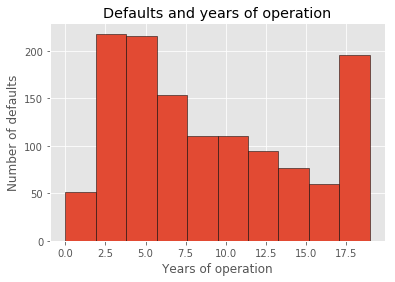

In [265]:
clients['years_operation'].plot.hist(edgecolor = 'black')
plt.title('Defaults and years of operation')
plt.xlabel('Years of operation')
plt.ylabel('Number of defaults')

In [139]:

import statsmodels.api as sm

In [266]:
X = clients[ ["years_operation"]]
y = clients["Binary"]

model = sm.Logit(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.612809
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Binary   No. Observations:                 1287
Model:                          Logit   Df Residuals:                     1286
Method:                           MLE   Df Model:                            0
Date:                Sat, 07 Sep 2019   Pseudo R-squ.:                -0.02396
Time:                        11:38:53   Log-Likelihood:                -788.69
converged:                       True   LL-Null:                       -770.23
                                        LLR p-value:                       nan
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
years_operation    -0.0829      0.006    -13.148      0.000      -0.095      -0.071
===================================================================================
"""

In [24]:
clients.head(10)

,entity_type,entity_year_established,years_operation,Binary,default
client_id,,,,,
1,Other Partnership,2006,12,0,0.0
2,Australian Private Company,2001,17,0,0.0
3,Australian Private Company,2002,16,0,0.0
4,Australian Private Company,2007,11,0,0.0
5,Australian Private Company,2007,11,0,0.0
6,Australian Private Company,2014,4,0,0.0
7,Australian Private Company,2015,3,1,9.0
8,Individual/Sole Trader,1999,19,0,0.0
9,Individual/Sole Trader,2004,14,0,0.0


In [267]:
#clients[clients['client_id'] == 1254]
#clients['default'] = 0
#clients.sort_values('client_id')
#clientdef.sort_values('client_id')
#clients['default'] = clientdef['count']
#clients.sort_values('client_id')
#clientdef.sort_values('client_id')
#Note clientdef is the number of times clients default on their loans
no_transactions = payments.groupby(by = ['client_id']).size().sort_values(ascending = False)
#type(no_transactions
frame = {'Contracts_no':no_transactions}
df = pd.DataFrame(frame)
df = df.sort_index()
clients = clients.fillna(0)
#clients = clients.sort_values('client_id')
#clients = clients.set_index('client_id')
clients['trans_no'] = df['Contracts_no']
clients.iloc[413]
clients.head(10)

,entity_type,entity_year_established,years_operation,Binary,default,trans_no
client_id,,,,,,
1,Other Partnership,2006,12,0,0.0,18
2,Australian Private Company,2001,17,0,0.0,8
3,Australian Private Company,2002,16,0,0.0,20
4,Australian Private Company,2007,11,0,0.0,22
5,Australian Private Company,2007,11,0,0.0,6
6,Australian Private Company,2014,4,0,0.0,22
7,Australian Private Company,2015,3,1,9.0,29
8,Individual/Sole Trader,1999,19,0,0.0,56
9,Individual/Sole Trader,2004,14,0,0.0,4


Text(0.5,1,'Annual Default payments')

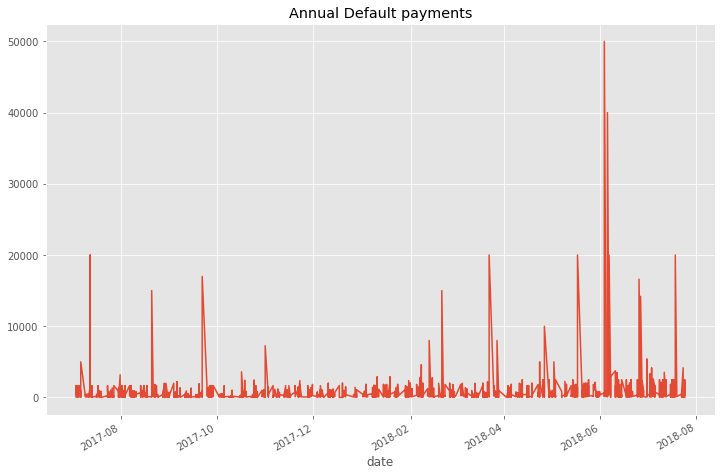

In [268]:
default.sort_values('date')
default['payment_amt'].plot(figsize = (12,8))
notdefault = payments[payments['Binary'] == 0]
plt.title('Annual Default payments')

In [269]:
default = payments[payments['Binary']== 1]
default.describe()

,transaction_id,contract_id,client_id,transaction_date,payment_amt,Binary
count,2219.000000,2219.000000,2219.000000,2.219000e+03,2219.000000,2219.0
mean,12739.108157,664.366832,592.547995,1.517096e+09,674.573673,1.0
std,7448.865118,331.397325,327.422681,1.009825e+07,2103.836815,0.0
min,143.000000,1.000000,7.000000,1.499105e+09,0.010000,1.0
25%,5995.000000,420.000000,293.000000,1.508087e+09,93.330000,1.0
50%,13122.000000,687.000000,591.000000,1.518542e+09,250.000000,1.0
75%,19038.500000,868.000000,859.000000,1.525889e+09,666.670000,1.0
max,25557.000000,1607.000000,1254.000000,1.532456e+09,50000.000000,1.0


Text(0.5,1,'Annual Payments')

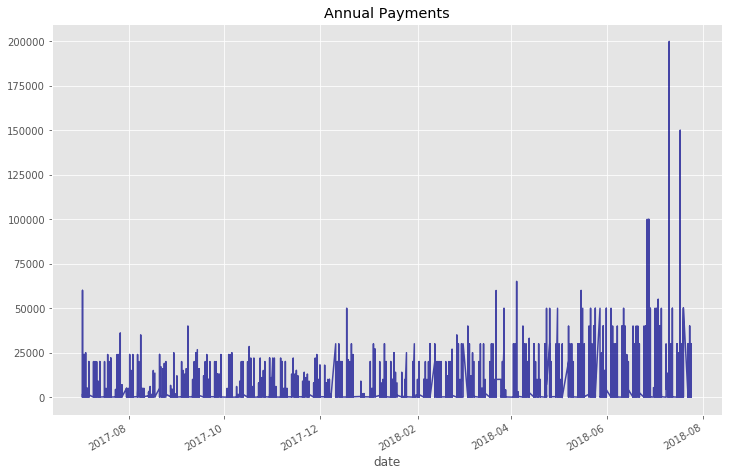

In [270]:
notdefault['payment_amt'].plot(figsize = (12,8), color = 'darkblue', alpha = .7)
plt.title('Annual Payments')


In [271]:
default['payment_amt'].sum()
payments['payment_amt'][payments['Binary']== 0].sum() + default['payment_amt'].sum()

31219186.000000004

In [272]:
default['payment_amt'].sum()/ (payments['payment_amt'][payments['Binary']== 0].sum() + default['payment_amt'].sum())

0.04794740580359782

In [961]:
default['contract_id'].value_counts().sort_values(ascending = False).describe()

count    378.000000
mean       5.870370
std        5.701377
min        1.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       32.000000
Name: contract_id, dtype: float64

In [962]:
payments['contract_id'].value_counts().sort_values(ascending = False).describe()


count    1643.000000
mean       15.556299
std        11.897439
min         1.000000
25%         6.000000
50%        13.000000
75%        22.000000
max       105.000000
Name: contract_id, dtype: float64

In [963]:
payments[(payments['Binary'] == 1) & (payments['client_id']== 413)].count()


transaction_id      32
contract_id         32
client_id           32
transaction_date    32
payment_amt         32
payment_code        32
Binary              32
dtype: int64

Text(0.5,1,'Number of transactions per customer')

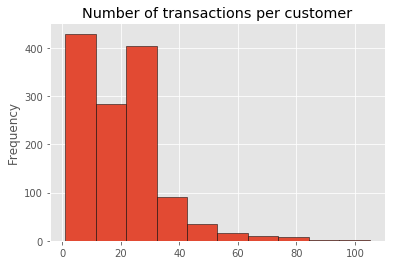

In [273]:
payments['client_id'].value_counts().sort_values(ascending = False).plot.hist(edgecolor = 'black')
plt.title('Number of transactions per customer')

In [274]:
num_cont = payments.groupby(['client_id','contract_id'])
len(payments['contract_id'].unique().tolist())


1643

In [287]:
default['client_id'].value_counts()
clients = clients.fillna(0)
clients

,entity_type,entity_year_established,years_operation,Binary,default,trans_no
client_id,,,,,,
1,Other Partnership,2006,12,0,0.0,18
2,Australian Private Company,2001,17,0,0.0,8
3,Australian Private Company,2002,16,0,0.0,20
4,Australian Private Company,2007,11,0,0.0,22
5,Australian Private Company,2007,11,0,0.0,6
6,Australian Private Company,2014,4,0,0.0,22
7,Australian Private Company,2015,3,1,9.0,29
8,Individual/Sole Trader,1999,19,0,0.0,56
9,Individual/Sole Trader,2004,14,0,0.0,4


In [288]:
pie = clients['entity_type'][clients['default'] > 0].value_counts()/clients['entity_type'][clients['default'] > 0].count()
pie

Australian Private Company        0.535326
Individual/Sole Trader            0.407609
Family Partnership                0.019022
Discretionary Trading Trust       0.013587
Australian Public Company         0.008152
Other Partnership                 0.008152
Discretionary Investment Trust    0.005435
Hybrid Trust                      0.002717
Name: entity_type, dtype: float64

Text(0.5,1,'Clients default years of operation')

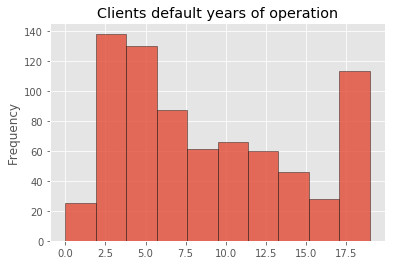

In [289]:
#out of the defaulted companies how many years of experience 
Private = clients[clients['entity_type'] == 'Australian Private Company']

Private['years_operation'].plot.hist(edgecolor = 'black', alpha = .8)
plt.title('Clients default years of operation')

Text(0.5,1,'Sole Trader Years of operation')

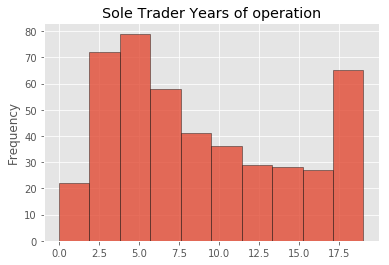

In [290]:
Sole = clients[clients['entity_type'] == 'Individual/Sole Trader']
Sole['years_operation'].plot.hist(edgecolor = 'black', alpha = .8)
Sole.count()[1]
plt.title('Sole Trader Years of operation')


In [820]:
Sole.describe()


,client_id,entity_year_established,default,Binary,years_operation
count,101.000000,101.000000,101.000000,101.0,101.000000
mean,626.603960,2009.118812,5.920792,1.0,8.881188
std,390.286128,5.644975,5.680991,0.0,5.644975
min,8.000000,1999.000000,1.000000,1.0,0.000000
25%,299.000000,2005.000000,2.000000,1.0,4.000000
50%,611.000000,2011.000000,4.000000,1.0,7.000000
75%,982.000000,2014.000000,8.000000,1.0,13.000000
max,1239.000000,2018.000000,32.000000,1.0,19.000000


In [655]:
Private['years_operation'].describe()

count    182.000000
mean       8.747253
std        5.540595
min        0.000000
25%        4.000000
50%        8.000000
75%       13.000000
max       18.000000
Name: years_operation, dtype: float64

In [834]:
Private[Private['years_operation'] > 7].count()/Private.count()

client_id                  0.505495
entity_type                0.505495
entity_year_established    0.505495
default                    0.505495
Binary                     0.505495
years_operation            0.505495
dtype: float64

In [831]:
Sole[Sole['years_operation'] > 6].count()/Sole.count()

client_id                  0.574257
entity_type                0.574257
entity_year_established    0.574257
default                    0.574257
Binary                     0.574257
years_operation            0.574257
dtype: float64

In [147]:
clients.corr()

,entity_year_established,years_operation,Binary,default,trans_no
entity_year_established,1.000000,-1.000000,0.058884,0.077515,0.019376
years_operation,-1.000000,1.000000,-0.058884,-0.077515,-0.019376
Binary,0.058884,-0.058884,1.000000,0.661040,0.478851
default,0.077515,-0.077515,0.661040,1.000000,0.681162
trans_no,0.019376,-0.019376,0.478851,0.681162,1.000000


In [671]:
#not defaulted
notfault = clients[clients['Binary'] == 0]
notfault['entity_type'].value_counts()/notfault['entity_type'].count()

Australian Private Company        0.581301
Individual/Sole Trader            0.361789
Family Partnership                0.027439
Discretionary Trading Trust       0.010163
Other Partnership                 0.008130
Australian Public Company         0.005081
Discretionary Investment Trust    0.003049
Fixed Unit Trust                  0.002033
Hybrid Trust                      0.001016
Name: entity_type, dtype: float64

In [673]:
clients['entity_type'].value_counts()/clients['entity_type'].count()

Australian Private Company        0.585859
Individual/Sole Trader            0.355089
Family Partnership                0.030303
Discretionary Trading Trust       0.009324
Other Partnership                 0.007770
Australian Public Company         0.004662
Fixed Unit Trust                  0.003108
Discretionary Investment Trust    0.002331
Australian Proprietary Company    0.000777
Hybrid Trust                      0.000777
Name: entity_type, dtype: float64

In [291]:
clients['num_trans'] = payments['client_id'].value_counts()
payments[payments['client_id']== 1].count()[0]
clients = clients.sort_values(by = 'client_id')
trans = payments.sort_values('client_id')['client_id'].value_counts()

Text(0,0.5,'Payment Amount')

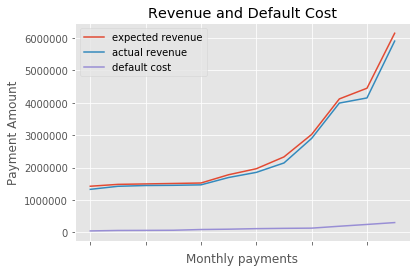

In [799]:
#Monthly payments
payments.groupby(payments['date'].dt.strftime('%B'))['payment_amt'].sum().sort_values().plot.line()
notdefault.groupby(notdefault['date'].dt.strftime('%B'))['payment_amt'].sum().sort_values().plot.line()
default.groupby(default['date'].dt.strftime('%B'))['payment_amt'].sum().sort_values().plot.line()
plt.title('Revenue and Default Cost')
plt.legend(['expected revenue','actual revenue', 'default cost'])
plt.xlabel('Monthly payments')
plt.ylabel('Payment Amount')

In [292]:
contracts = payments.groupby(['client_id','contract_id']).count()


In [294]:
#Get the number of contracts per customer
flag = True
L = []
past = 0
t = 1
while(t < 1282):
    for i in contracts.iteritems():
        x = len(i[1][t])
        break
    L.append(x)
    t += 1
print(len(L))

1281


In [295]:
L.insert(0,0)
print(len(L))


1282


In [299]:
del clients['trans_no']

KeyError: 'trans_no'

In [301]:
clients.head(10)

,entity_type,entity_year_established,years_operation,Binary,default,num_trans
client_id,,,,,,
1,Other Partnership,2006,12,0,0.0,18
2,Australian Private Company,2001,17,0,0.0,8
3,Australian Private Company,2002,16,0,0.0,20
4,Australian Private Company,2007,11,0,0.0,22
5,Australian Private Company,2007,11,0,0.0,6
6,Australian Private Company,2014,4,0,0.0,22
7,Australian Private Company,2015,3,1,9.0,29
8,Individual/Sole Trader,1999,19,0,0.0,56
9,Individual/Sole Trader,2004,14,0,0.0,4


In [302]:
monthly = payments.groupby('client_id')["payment_amt"].resample("M").sum()
monthly

client_id  date      
1          2017-11-30      5633.37
           2017-12-31       483.33
           2018-01-31         0.00
           2018-02-28       483.33
           2018-03-31       483.33
           2018-04-30       483.33
           2018-05-31       483.33
           2018-06-30       483.33
           2018-07-31       483.33
2          2018-05-31     22083.37
           2018-06-30      1933.33
           2018-07-31      1933.33
3          2017-07-31       565.00
           2017-08-31         0.00
           2017-09-30         0.00
           2017-10-31         0.00
           2017-11-30      2343.37
           2017-12-31       193.33
           2018-01-31       193.33
           2018-02-28       193.33
           2018-03-31       193.33
           2018-04-30       193.33
           2018-05-31       193.33
           2018-06-30       193.33
4          2017-09-30      4536.62
           2017-10-31       386.66
           2017-11-30       386.66
           2017-12-31       386.6

In [303]:

#Get monthly payments
past = 0
count = 0
Payments = 0
flag = True
mean = 0
A_mon = []
Total_Payment = []
client_id = []
number_payments = []
for i in monthly.iteritems():
    if(past != i[0][0] or flag == True):
        if(flag == False):
            mean = Payments/count
        #print('Total payments:',count,payments,mean)
        #print(i[0][0], 'start check')
        Total_Payment.append(Payments)
        client_id.append(past)
        number_payments.append(count)
        A_mon.append(mean)
        count = 1
        Payments = i[1]
        flag = False
    else:
        #print(i[1])
        Payments += i[1]
        count += 1
    past = i[0][0]
mean = Payments/count
Total_Payment.append(Payments)
client_id.append(past)
number_payments.append(count)
A_mon.append(mean)
dic = {'mean_payments':A_mon,'Total_payments':Total_Payment, 'client_id':client_id, 'num_payments':number_payments, 'no_contracts':L}

In [304]:
df = pd.DataFrame(dic)
df = df.drop(0)
#monthly payments , total payments and number of payments
df


,mean_payments,Total_payments,client_id,num_payments,no_contracts
1,1001.853333,9016.68,1,9,1
2,8650.010000,25950.03,2,3,1
3,355.140000,4261.68,3,12,2
4,801.656000,8016.56,4,10,1
5,2605.845000,5211.69,5,2,1
6,1189.737692,15466.59,6,13,2
7,1959.527143,13716.69,7,7,1
8,4523.780000,58809.14,8,13,4
9,6519.530000,6519.53,9,1,1
10,3765.151818,41416.67,10,11,1


In [207]:
merge = pd.merge(left = clients,right = df, on = 'client_id', how = 'left')

In [307]:
merge[merge['client_id']== 1281]

,client_id,entity_type,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts
1286,1281,Australian Private Company,2012,6,0,0.0,2,20000.06,20000.06,1,1


In [310]:
merge.set_index('client_id')

,entity_type,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts
client_id,,,,,,,,,,
1,Other Partnership,2006,12,0,0.0,18,1001.853333,9016.68,9,1
2,Australian Private Company,2001,17,0,0.0,8,8650.010000,25950.03,3,1
3,Australian Private Company,2002,16,0,0.0,20,355.140000,4261.68,12,2
4,Australian Private Company,2007,11,0,0.0,22,801.656000,8016.56,10,1
5,Australian Private Company,2007,11,0,0.0,6,2605.845000,5211.69,2,1
6,Australian Private Company,2014,4,0,0.0,22,1189.737692,15466.59,13,2
7,Australian Private Company,2015,3,1,9.0,29,1959.527143,13716.69,7,1
8,Individual/Sole Trader,1999,19,0,0.0,56,4523.780000,58809.14,13,4
9,Individual/Sole Trader,2004,14,0,0.0,4,6519.530000,6519.53,1,1


In [311]:
default = merge[merge['Binary']==1]

In [314]:
merge.describe()

,client_id,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000
mean,641.025641,2009.072261,8.927739,0.285936,1.737374,20.088578,5694.893830,24619.614095,7.360528,1.292152
std,369.778060,5.708598,5.708598,0.452035,4.154972,14.234590,11574.171960,25164.220508,4.373566,0.552212
min,1.000000,1999.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.010000,1.000000,1.000000
25%,321.500000,2004.000000,4.000000,0.000000,0.000000,8.000000,1169.190839,8084.970000,3.000000,1.000000
50%,640.000000,2010.000000,8.000000,0.000000,0.000000,18.000000,2426.670000,17250.000000,7.000000,1.000000
75%,960.500000,2014.000000,14.000000,1.000000,2.000000,28.000000,5597.129423,33683.350000,12.000000,2.000000
max,1281.000000,2018.000000,19.000000,1.000000,34.000000,105.000000,217316.740000,284276.590000,13.000000,5.000000


In [317]:
merge[merge['no_contracts'] > 1].describe()

,client_id,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,590.443425,2008.394495,9.605505,0.321101,1.733945,32.321101,3850.184951,40313.888226,12.278287,2.149847
std,323.455266,5.507416,5.507416,0.467615,4.185079,10.937256,5907.221425,31926.445528,1.996681,0.462248
min,3.000000,1999.000000,1.000000,0.000000,0.000000,6.000000,283.540000,3402.480000,1.000000,2.000000
25%,330.000000,2004.000000,5.000000,0.000000,0.000000,28.000000,1416.454231,17729.505000,12.000000,2.000000
50%,591.000000,2010.000000,8.000000,0.000000,0.000000,30.000000,2541.028462,31750.030000,13.000000,2.000000
75%,860.000000,2013.000000,14.000000,1.000000,2.000000,34.000000,4555.126154,56470.990000,13.000000,2.000000
max,1262.000000,2017.000000,19.000000,1.000000,34.000000,92.000000,74999.940000,284276.590000,13.000000,5.000000


In [329]:
merge['Binary'][(merge['no_contracts'] > 1) &  (merge['Binary'] == 1) ].count()

105

Text(0.5,1,'Default prone Customers')

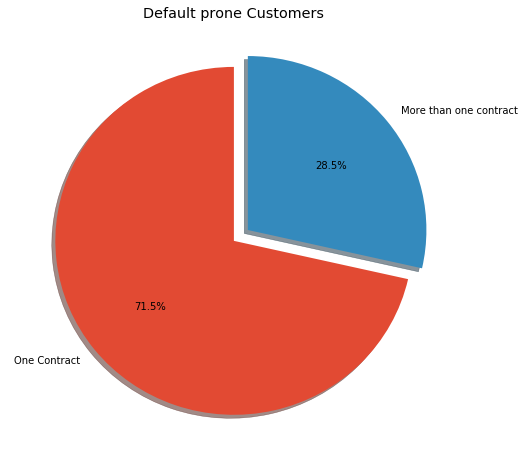

In [334]:
sizes = [ 263, 105]
#plt.plot.pie
fig1, ax1 = plt.subplots(figsize = (8,8))
explode = [0,.1]
labels = ['One Contract','More than one contract']
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True ,startangle = 90)
plt.title('Default prone Customers')

Text(0.5,0,'Mean payment')

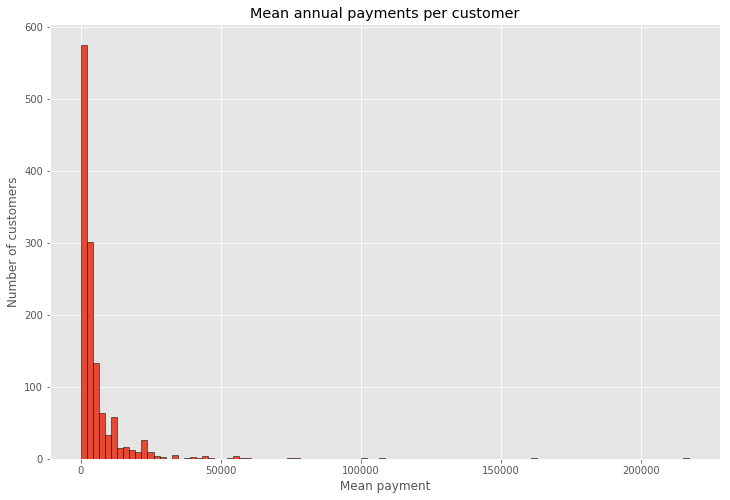

In [358]:
merge['mean_payments'].plot.hist(bins = 100, figsize = (12,8), edgecolor = 'black' )
merge['log_mean_payments'] = np.log(merge['mean_payments'])
plt.title('Mean annual payments per customer')
plt.ylabel('Number of customers')
plt.xlabel('Mean payment')

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  0.,  1.,  2.,  1.,  1., 17.,  6., 19., 11., 22., 38., 31.,
        28., 32., 49., 55., 66., 68., 78., 73., 77., 78., 74., 72., 48.,
        53., 41., 27., 22., 53., 23., 22., 20., 39.,  5.,  6.,  4.,  7.,
         5.,  2.,  2.,  0.,  2.,  0.,  0.,  1.,  1.]),
 array([-4.60517019, -4.43622737, -4.26728456, -4.09834174, -3.92939893,
        -3.76045612, -3.5915133 , -3.42257049, -3.25362768, -3.08468486,
        -2.91574205, -2.74679923, -2.57785642, -2.40891361, -2.23997079,
        -2.07102798, -1.90208516, -1.73314235, -1.56419954, -1.39525672,
        -1.22631391, -1.0573711 , -0.88842828, -0.71948547, -0.55054265,
        -0.38159984, -0.21265703, -0.04371421,  0.1252286 ,  0.294171

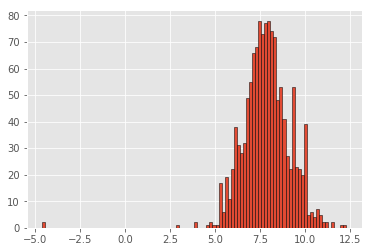

In [351]:
plt.hist(log, edgecolor = 'black', bins = 100)

Text(0.5,1,'Total payments during the year')

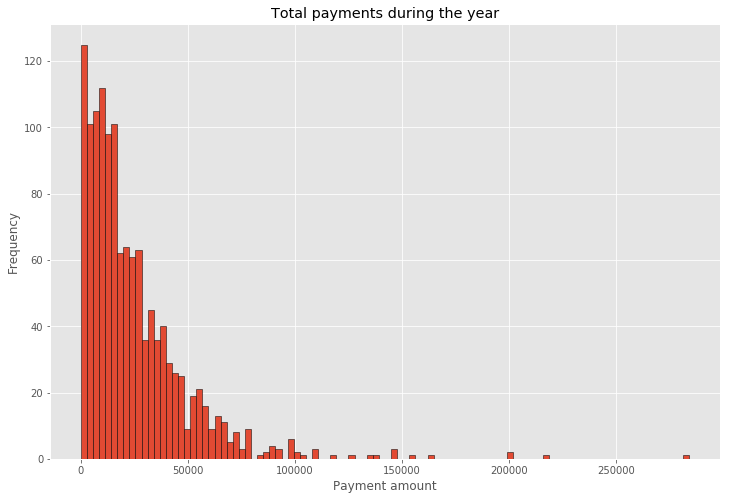

In [496]:
merge['Total_payments'].plot.hist(edgecolor = 'black', bins = 100, figsize = (12,8))
plt.xlabel('Payment amount')
plt.title('Total payments during the year')

Text(0.5,0,'Total log payment')

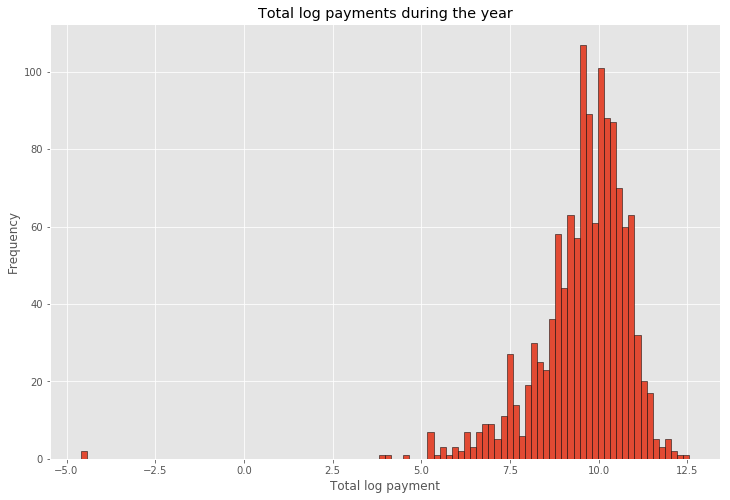

In [498]:
merge['total_log'] = np.log(merge['Total_payments'])
merge['total_log'].plot.hist(edgecolor = 'black', bins = 100, figsize = (12,8))
plt.title('Total log payments during the year')
plt.xlabel('Total log payment')

In [374]:
merge.corr()

,client_id,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts,log_mean_payments,total_log
client_id,1.000000,0.076524,-0.076524,-0.055166,-0.053936,-0.145881,0.201196,0.084542,-0.204324,-0.078614,0.228752,0.105552
entity_year_established,0.076524,1.000000,-1.000000,0.058884,0.077515,0.019376,-0.052813,-0.063430,-0.029044,-0.067137,-0.028760,-0.027881
years_operation,-0.076524,-1.000000,1.000000,-0.058884,-0.077515,-0.019376,0.052813,0.063430,0.029044,0.067137,0.028760,0.027881
Binary,-0.055166,0.058884,-0.058884,1.000000,0.661040,0.478851,-0.083290,0.065505,0.166504,0.066939,-0.082434,0.026815
default,-0.053936,0.077515,-0.077515,0.661040,1.000000,0.681162,-0.064626,0.103348,0.173983,0.004320,-0.024950,0.094481
trans_no,-0.145881,0.019376,-0.019376,0.478851,0.681162,1.000000,-0.234839,0.284360,0.775057,0.525165,-0.135215,0.331853
mean_payments,0.201196,-0.052813,0.052813,-0.083290,-0.064626,-0.234839,1.000000,0.555499,-0.341982,-0.066449,0.608955,0.348509
Total_payments,0.084542,-0.063430,0.063430,0.065505,0.103348,0.284360,0.555499,1.000000,0.203216,0.411630,0.603200,0.701078
num_payments,-0.204324,-0.029044,0.029044,0.166504,0.173983,0.775057,-0.341982,0.203216,1.000000,0.598365,-0.285325,0.312822
no_contracts,-0.078614,-0.067137,0.067137,0.066939,0.004320,0.525165,-0.066449,0.411630,0.598365,1.000000,0.033567,0.333905


In [375]:
merge.head(10)

,client_id,entity_type,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts,log_mean_payments,total_log
0,1,Other Partnership,2006,12,0,0.0,18,1001.853333,9016.68,9,1,6.909607,9.106831
1,2,Australian Private Company,2001,17,0,0.0,8,8650.010000,25950.03,3,1,9.065316,10.163928
2,3,Australian Private Company,2002,16,0,0.0,20,355.140000,4261.68,12,2,5.872512,8.357419
3,4,Australian Private Company,2007,11,0,0.0,22,801.656000,8016.56,10,1,6.686680,8.989265
4,5,Australian Private Company,2007,11,0,0.0,6,2605.845000,5211.69,2,1,7.865512,8.558659
5,6,Australian Private Company,2014,4,0,0.0,22,1189.737692,15466.59,13,2,7.081488,9.646437
6,7,Australian Private Company,2015,3,1,9.0,29,1959.527143,13716.69,7,1,7.580458,9.526369
7,8,Individual/Sole Trader,1999,19,0,0.0,56,4523.780000,58809.14,13,4,8.417103,10.982053
8,9,Individual/Sole Trader,2004,14,0,0.0,4,6519.530000,6519.53,1,1,8.782558,8.782558
9,10,Australian Private Company,2000,18,0,0.0,24,3765.151818,41416.67,11,1,8.233543,10.631439


In [580]:
#Include in the model transaction number, default number and years of operation
X = merge.iloc[:, [3,6]].values
y = merge.iloc[:,4].values
X

array([[12, 18],
       [17,  8],
       [16, 20],
       ...,
       [ 1,  4],
       [ 2,  4],
       [ 6,  2]], dtype=int64)

In [582]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
#print(len(X_train))
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.98      0.87       365
          1       0.87      0.37      0.52       150

avg / total       0.81      0.80      0.77       515



C:\Users\Jose Ca\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Jose Ca\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Jose Ca\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [583]:
cm

array([[357,   8],
       [ 95,  55]], dtype=int64)

Text(0.5,257.44,'Predicted label')

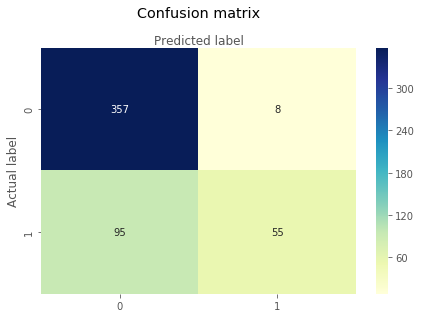

In [584]:
#Visualising confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

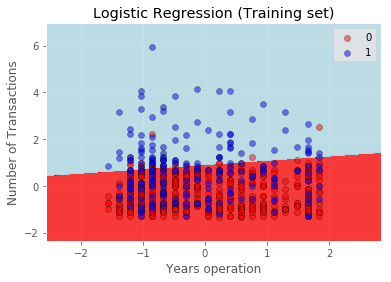

In [585]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter( X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j, edgecolors = 'black', alpha = .5)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Years operation')
plt.ylabel('Number of Transactions')
plt.legend()

In [545]:
cm
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.98      0.87       365
          1       0.87      0.37      0.52       150

avg / total       0.81      0.80      0.77       515



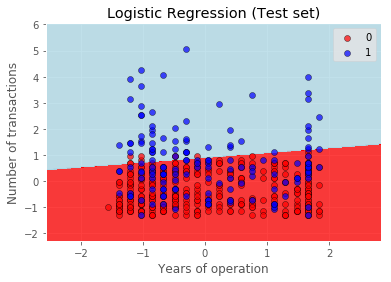

In [546]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j,edgecolors = 'black', alpha = .7)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Years of operation')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()


In [451]:
X = merge[ ["years_operation","trans_no"]]
y = merge["Binary"]

model = sm.Logit(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.579991
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Binary   No. Observations:                 1287
Model:                          Logit   Df Residuals:                     1285
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Sep 2019   Pseudo R-squ.:                 0.03088
Time:                        18:28:34   Log-Likelihood:                -746.45
converged:                       True   LL-Null:                       -770.23
                                        LLR p-value:                 5.298e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
years_operation    -0.1427      0.010    -14.200      0.000      -0.162      -0.123
trans_no            0.0321      0.004      8.611      0.000       0.025       0.039
===================================================================================
"""

In [454]:
X = merge[ ["years_operation","trans_no","total_log"]]
y = merge["Binary"]

model = sm.Logit(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.461274
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Binary   No. Observations:                 1287
Model:                          Logit   Df Residuals:                     1284
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Sep 2019   Pseudo R-squ.:                  0.2292
Time:                        18:31:22   Log-Likelihood:                -593.66
converged:                       True   LL-Null:                       -770.23
                                        LLR p-value:                 2.062e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
years_operation    -0.0242      0.013     -1.896      0.058      -0.049       0.001
trans_no            0.1088      0.007     14.641      0.000       0.094       0.123
total_log          -0.3251      0.023    -14.389      0.000      -0.369      -0.281
===================================================================================
"""

In [457]:
X = merge[ ["years_operation","trans_no","log_mean_payments"]]
y = merge["Binary"]

model = sm.Logit(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.482846
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Binary   No. Observations:                 1287
Model:                          Logit   Df Residuals:                     1284
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Sep 2019   Pseudo R-squ.:                  0.1932
Time:                        18:33:53   Log-Likelihood:                -621.42
converged:                       True   LL-Null:                       -770.23
                                        LLR p-value:                 2.353e-65
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
years_operation      -0.0388      0.012     -3.123      0.002      -0.063      -0.014
trans_no              0.0838      0.006     13.756      0.000       0.072       0.096
log_mean_payments    -0.3120      0.023    -13.357      0.000      -0.358      -0.266
=====================================================================================
"""

Text(0.5,0,'Number of transactions')

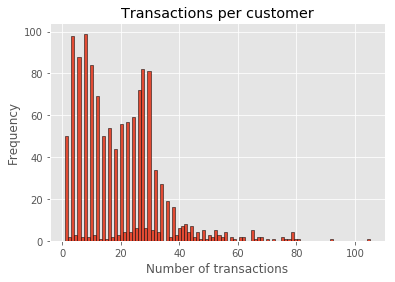

In [494]:
merge['trans_no'].plot.hist(bins = 100, edgecolor = 'black')
plt.title('Transactions per customer')
plt.xlabel('Number of transactions')

In [471]:
merge['trans_no'].describe()

count    1287.000000
mean       20.088578
std        14.234590
min         1.000000
25%         8.000000
50%        18.000000
75%        28.000000
max       105.000000
Name: trans_no, dtype: float64

In [474]:
merge[merge['trans_no'] == 105]

,client_id,entity_type,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts,log_mean_payments,total_log
413,413,Australian Private Company,2014,4,1,32.0,105,9776.72,97767.2,10,1,9.187759,11.490344


In [480]:
default = merge[merge['Binary'] == 1]
default['entity_type'].value_counts()/368

Australian Private Company        0.535326
Individual/Sole Trader            0.407609
Family Partnership                0.019022
Discretionary Trading Trust       0.013587
Australian Public Company         0.008152
Other Partnership                 0.008152
Discretionary Investment Trust    0.005435
Hybrid Trust                      0.002717
Name: entity_type, dtype: float64

In [486]:
payments[ (payments['payment_code'] == 'DEFAULT') & (payments['payment_amt'] >= 20000)]

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,Binary
date,,,,,,,
2017-07-12 18:08:17,676,606,224,1499882897,20000.0,DEFAULT,1
2018-05-17 18:08:35,19804,1359,301,1526580515,20000.0,DEFAULT,1
2018-06-05 18:08:47,21209,1411,732,1528222127,40000.0,DEFAULT,1
2018-07-18 18:09:21,25011,1607,789,1531937361,20000.0,DEFAULT,1
2018-06-06 18:09:11,21276,1425,1041,1528308551,20000.0,DEFAULT,1
2018-03-22 17:08:25,15751,1183,1195,1521738505,20000.0,DEFAULT,1
2018-03-22 17:08:25,15749,1183,1195,1521738505,20000.0,DEFAULT,1
2018-03-22 17:08:25,15746,1183,1195,1521738505,20000.0,DEFAULT,1
2018-03-22 17:08:25,15750,1183,1195,1521738505,20000.0,DEFAULT,1


In [489]:
merge[merge['client_id']== 1195]

,client_id,entity_type,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts,log_mean_payments,total_log
1199,1195,Discretionary Investment Trust,2015,3,1,14.0,41,56855.318,284276.59,5,2,10.948265,12.557703


In [492]:
merge[merge['client_id']== 1205]

,client_id,entity_type,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts,log_mean_payments,total_log
1209,1205,Australian Private Company,2003,15,1,1.0,6,77135.45,154270.9,2,1,11.253318,11.946465


In [510]:
merge[merge['client_id']== 732]

,client_id,entity_type,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts,log_mean_payments,total_log
735,732,Australian Private Company,2006,12,1,3.0,12,45205.533333,135616.6,3,1,10.718975,11.817587


In [596]:
payments[ (payments['Binary'] == 1) & (payments['payment_amt'] >= 20000 ) ].sort_values('date')

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,Binary
date,,,,,,,
2017-07-12 18:08:17,676,606,224,1499882897,20000.0,DEFAULT,1
2018-03-22 17:08:25,15751,1183,1195,1521738505,20000.0,DEFAULT,1
2018-03-22 17:08:25,15749,1183,1195,1521738505,20000.0,DEFAULT,1
2018-03-22 17:08:25,15746,1183,1195,1521738505,20000.0,DEFAULT,1
2018-03-22 17:08:25,15750,1183,1195,1521738505,20000.0,DEFAULT,1
2018-03-22 17:08:25,15747,1183,1195,1521738505,20000.0,DEFAULT,1
2018-05-17 18:08:35,19804,1359,301,1526580515,20000.0,DEFAULT,1
2018-06-03 18:08:37,21036,1398,1205,1528049317,50000.0,DEFAULT,1
2018-06-05 18:08:47,21209,1411,732,1528222127,40000.0,DEFAULT,1


Text(0.5,1,'Correlation between no_contracts vs no_transactions')

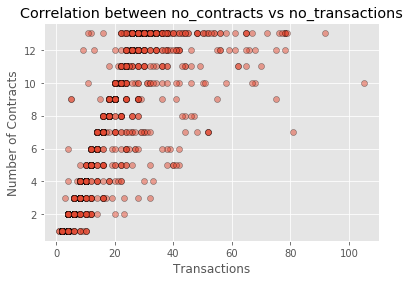

In [519]:
plt.scatter(merge['trans_no'],merge['num_payments'], edgecolor = 'black', alpha = .5)
plt.xlabel('Transactions')
plt.ylabel('Number of Contracts')
plt.title('Correlation between no_contracts vs no_transactions')

In [555]:
X = merge[ ["years_operation","trans_no","total_log"]]
y = merge["Binary"]

model = sm.Logit(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.461274
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Binary   No. Observations:                 1287
Model:                          Logit   Df Residuals:                     1284
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Sep 2019   Pseudo R-squ.:                  0.2292
Time:                        20:54:34   Log-Likelihood:                -593.66
converged:                       True   LL-Null:                       -770.23
                                        LLR p-value:                 2.062e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
years_operation    -0.0242      0.013     -1.896      0.058      -0.049       0.001
trans_no            0.1088      0.007     14.641      0.000       0.094       0.123
total_log          -0.3251      0.023    -14.389      0.000      -0.369      -0.281
===================================================================================
"""

In [556]:
X = merge[ ["years_operation","trans_no","no_contracts"]]
y = merge["Binary"]

model = sm.Logit(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.466705
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Binary   No. Observations:                 1287
Model:                          Logit   Df Residuals:                     1284
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Sep 2019   Pseudo R-squ.:                  0.2202
Time:                        20:56:29   Log-Likelihood:                -600.65
converged:                       True   LL-Null:                       -770.23
                                        LLR p-value:                 2.239e-74
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
years_operation    -0.0698      0.012     -5.990      0.000      -0.093      -0.047
trans_no            0.1357      0.009     14.437      0.000       0.117       0.154
no_contracts       -2.3167      0.163    -14.222      0.000      -2.636      -1.997
===================================================================================
"""

In [566]:
merge['discretionary'] = 0
merge.loc[ (merge['entity_type'] == 'Discretionary Investment Trust'), ['discretionary']] = [1]
merge[merge['discretionary'] == 1]


,client_id,entity_type,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts,log_mean_payments,total_log,discretionary
274,274,Discretionary Investment Trust,2008,10,0,0.0,18,4268.755000,34150.04,8,1,8.359077,10.438519,1
801,797,Discretionary Investment Trust,2016,2,1,9.0,65,2402.166923,31228.17,13,4,7.784126,10.349076,1
1199,1195,Discretionary Investment Trust,2015,3,1,14.0,41,56855.318000,284276.59,5,2,10.948265,12.557703,1


In [586]:
merge['private'] = 0
merge.loc[ (merge['entity_type'] == 'Australian Private Company'), ['private']] = [1]
merge['sole'] = 0
merge.loc[ (merge['entity_type'] == 'Individual/Sole Trader'), ['sole']] = [1]
merge.corr()

,client_id,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts,log_mean_payments,total_log,discretionary,private,sole
client_id,1.000000,0.076524,-0.076524,-0.055166,-0.053936,-0.145881,0.201196,0.084542,-0.204324,-0.078614,0.228752,0.105552,0.014948,0.023150,-0.032874
entity_year_established,0.076524,1.000000,-1.000000,0.058884,0.077515,0.019376,-0.052813,-0.063430,-0.029044,-0.067137,-0.028760,-0.027881,0.033271,0.025298,0.006822
years_operation,-0.076524,-1.000000,1.000000,-0.058884,-0.077515,-0.019376,0.052813,0.063430,0.029044,0.067137,0.028760,0.027881,-0.033271,-0.025298,-0.006822
Binary,-0.055166,0.058884,-0.058884,1.000000,0.661040,0.478851,-0.083290,0.065505,0.166504,0.066939,-0.082434,0.026815,0.040728,-0.064918,0.069449
default,-0.053936,0.077515,-0.077515,0.661040,1.000000,0.681162,-0.064626,0.103348,0.173983,0.004320,-0.024950,0.094481,0.069005,-0.028857,0.041838
trans_no,-0.145881,0.019376,-0.019376,0.478851,0.681162,1.000000,-0.234839,0.284360,0.775057,0.525165,-0.135215,0.331853,0.072169,-0.009843,0.027104
mean_payments,0.201196,-0.052813,0.052813,-0.083290,-0.064626,-0.234839,1.000000,0.555499,-0.341982,-0.066449,0.608955,0.348509,0.064676,0.145105,-0.159603
Total_payments,0.084542,-0.063430,0.063430,0.065505,0.103348,0.284360,0.555499,1.000000,0.203216,0.411630,0.603200,0.701078,0.176657,0.261992,-0.264930
num_payments,-0.204324,-0.029044,0.029044,0.166504,0.173983,0.775057,-0.341982,0.203216,1.000000,0.598365,-0.285325,0.312822,0.014441,0.000058,0.020515
no_contracts,-0.078614,-0.067137,0.067137,0.066939,0.004320,0.525165,-0.066449,0.411630,0.598365,1.000000,0.033567,0.333905,0.091173,0.039199,-0.039750


In [597]:
X = merge[ ["years_operation","trans_no","discretionary","total_log"]]
y = merge["Binary"]

model = sm.Logit(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.461192
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Binary   No. Observations:                 1287
Model:                          Logit   Df Residuals:                     1283
Method:                           MLE   Df Model:                            3
Date:                Sun, 08 Sep 2019   Pseudo R-squ.:                  0.2294
Time:                        13:17:06   Log-Likelihood:                -593.55
converged:                       True   LL-Null:                       -770.23
                                        LLR p-value:                 2.791e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
years_operation    -0.0240      0.013     -1.877      0.061      -0.049       0.001
trans_no            0.1087      0.007     14.626      0.000       0.094       0.123
discretionary       0.7214      1.570      0.460      0.646      -2.356       3.798
total_log          -0.3253      0.023    -14.390      0.000      -0.370      -0.281
===================================================================================
"""

In [600]:
merge[merge['client_id'] == 1195]

,client_id,entity_type,entity_year_established,years_operation,Binary,default,trans_no,mean_payments,Total_payments,num_payments,no_contracts,log_mean_payments,total_log,discretionary,private,sole
1199,1195,Discretionary Investment Trust,2015,3,1,14.0,41,56855.318,284276.59,5,2,10.948265,12.557703,1,0,0
